In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader
from torchvision import transforms, datasets, models

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
from PIL import Image
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

In [41]:
import glob

In [3]:
import cv2
from cv2 import dnn_superres

**Importing the pretrained model - EDSR**

In [4]:
sr = dnn_superres.DnnSuperResImpl_create()

path = '/Users/karthik/EDSR_x2.pb'

In [5]:
sr.readModel(path)

In [6]:
sr.setModel('edsr', 2)

**Load the image**

In [7]:
image_path = '/Users/karthik/GANS/Bio_Material_DATA/1by4/below_100/processed_Pattern_FeatureIdx_1013_TopoUnit_4X4.png'

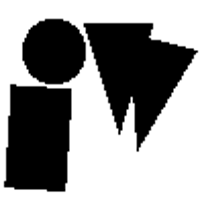

In [29]:
img = Image.open(image_path)

# Set the desired display width and height in pixels
display_width = 200
display_height = 200

# Display the image with the specified dimensions
display(img.resize((display_width, display_height)))

In [31]:
img.size

(98, 95)

In [9]:
image = cv2.imread(image_path)

**Upscaling the Image**

In [10]:
upscaled = sr.upsample(image)

In [11]:
cv2.imwrite('upscaled_topo_EDSR.png', upscaled)

True

**Using LapSRN**

In [12]:
sr = dnn_superres.DnnSuperResImpl_create()

In [13]:
path = '/Users/karthik/LapSRN_x2.pb'
sr.readModel(path)
sr.setModel('lapsrn', 2)

In [14]:
upscaled = sr.upsample(image)

In [15]:
cv2.imwrite('upscaled_topo_LapSRN.png', upscaled)

True

**Loading the upscaled image using EDSR**

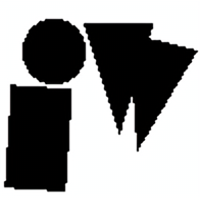

In [32]:
image_path_edsr = '/Users/karthik/GANS/upscaled_topo_EDSR.png'

image_edsr = Image.open(image_path_edsr)

# Set the desired display width and height in pixels
display_width = 200
display_height = 200

# Display the image with the specified dimensions
display(image_edsr.resize((display_width, display_height)))

In [33]:
image_edsr.size

(196, 190)

**Loading the upscaled image using LapSRN**

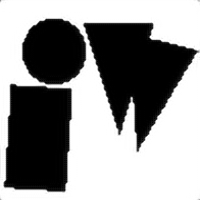

In [34]:
image_path_lap = '/Users/karthik/GANS/upscaled_topo_LapSRN.png'

image_lap = Image.open(image_path_lap)

# Set the desired display width and height in pixels
display_width = 200
display_height = 200

# Display the image with the specified dimensions
display(image_lap.resize((display_width, display_height)))

In [35]:
image_lap.size

(196, 190)

**Evaluating the upscaled images using PSNR Score**

- Evaluating EDSR  

In [20]:
def mse(imageA, imageB):
    # The 'float' casting here is to avoid overflow issues for uint8
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1] * imageA.shape[2])
    return err

def psnr(original, upscaled):
    mse_value = mse(original, upscaled)
    if mse_value == 0:
        return float('inf')  # Infinite PSNR if no noise is present
    max_pixel = 255.0
    psnr_value = 20 * np.log10(max_pixel / np.sqrt(mse_value))
    return psnr_value

In [21]:
original = cv2.imread(image_path)
upscaled = cv2.imread('/Users/karthik/GANS/upscaled_topo_EDSR.png')

In [22]:
# Ensure both images are loaded
if original is None or upscaled is None:
    print("Error: One of the images did not load correctly. Check file paths.")
    exit()

# Print out the shape of the images
print(f"Original image shape: {original.shape}")
print(f"Upscaled image shape: {upscaled.shape}")

# Convert images to the same number of channels if necessary
if len(original.shape) != len(upscaled.shape):
    if len(original.shape) == 2:  # original image is grayscale
        original = cv2.cvtColor(original, cv2.COLOR_GRAY2BGR)
    elif len(upscaled.shape) == 2:  # upscaled image is grayscale
        upscaled = cv2.cvtColor(upscaled, cv2.COLOR_GRAY2BGR)

# Resize the upscaled image to the size of the original image
upscaled_downscaled = cv2.resize(upscaled, (original.shape[1], original.shape[0]), interpolation=cv2.INTER_AREA)

# Calculate PSNR
psnr_value = psnr(original, upscaled_downscaled)
print(f"PSNR value is {psnr_value} dB")

Original image shape: (95, 98, 3)
Upscaled image shape: (190, 196, 3)
PSNR value is 31.23505431117705 dB


- Evaluating LapSRN

In [26]:
original_path = image_path
upscaled_path = '/Users/karthik/GANS/upscaled_topo_LapSRN.png'

# Load the images
original = cv2.imread(original_path)
upscaled = cv2.imread(upscaled_path)

In [27]:
 # Ensure both images are loaded
if original is None or upscaled is None:
    print("Error: One of the images did not load correctly. Check file paths.")
    exit()

# Print out the shape of the images
print(f"Original image shape: {original.shape}")
print(f"Upscaled image shape: {upscaled.shape}")

# Convert images to the same number of channels if necessary
if len(original.shape) != len(upscaled.shape):
    if len(original.shape) == 2:  # original image is grayscale
        original = cv2.cvtColor(original, cv2.COLOR_GRAY2BGR)
    elif len(upscaled.shape) == 2:  # upscaled image is grayscale
        upscaled = cv2.cvtColor(upscaled, cv2.COLOR_GRAY2BGR)

# Resize the upscaled image to the size of the original image
upscaled_downscaled = cv2.resize(upscaled, (original.shape[1], original.shape[0]), interpolation=cv2.INTER_AREA)

# Calculate PSNR
psnr_value = psnr(original, upscaled_downscaled)
print(f"PSNR value is {psnr_value} dB")

Original image shape: (95, 98, 3)
Upscaled image shape: (190, 196, 3)
PSNR value is 28.038171024541818 dB


**Upscaling all the images below 100 pixels using EDSR**

In [36]:
sr = cv2.dnn_superres.DnnSuperResImpl_create()

In [38]:
model_path = '/Users/karthik/EDSR_x2.pb'
sr.readModel(model_path)
sr.setModel('edsr', 2)

In [39]:
input_folder = '/Users/karthik/GANS/Bio_Material_DATA/1by4/below_100/'

output_folder = '/Users/karthik/GANS/Bio_Material_DATA/1by4/upscaled_below_100/'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

In [42]:
image_files = glob.glob(os.path.join(input_folder, "*.png"))

In [43]:
for image_file in image_files:
    # Read the image
    image = cv2.imread(image_file)

    # Upsample the image
    upscaled = sr.upsample(image)

    # Define output filename
    base_name = os.path.basename(image_file)
    output_file = os.path.join(output_folder, "upscaled_" + base_name)

    # Save the upscaled image
    cv2.imwrite(output_file, upscaled)

print("Upscaling complete!")

Upscaling complete!
